# Neural network in scikit-learn

Using a neural network to read handwritten numbers.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import math

## Load data

Dataset citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [2]:
# UCI ML hand-written digits datasets
# http://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset
digits = datasets.load_digits()

In [3]:
X = digits.images # images
y = digits.target # target values

In [4]:
X.shape

(1797, 8, 8)

In [5]:
y.shape

(1797,)

The dataset comprises 1,797 examples of handwritten digits, each a 8x8 pixel image.

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The numbers are between 0 and 9

## Display data

In [7]:
# Randomly select 100 images to display
m = X.shape[0]
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :, :]

In [8]:
def display_digits(X):
    '''
    Displays 2D data stored in X in a nice grid.
    '''
    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        image = X[i]
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='Greys')
        plt.axis('off')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

A selection of 100 random images from the dataset:


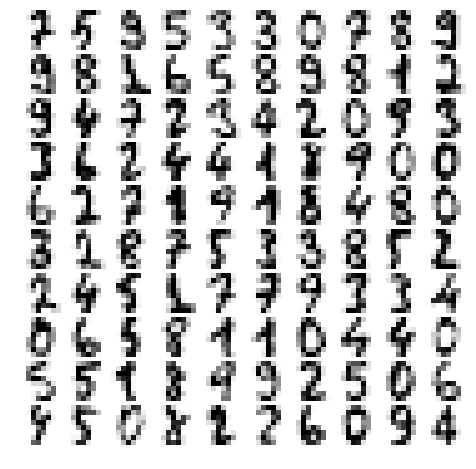

In [9]:
print('A selection of 100 random images from the dataset:')
display_digits(sel)

## Format data

In [10]:
# MLPClassifier needs flat data
X = X.reshape(m, -1)
X.shape

(1797, 64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train and test neural network

The ideal number of hidden layers, and number of nodes in a hidden layer, is a subject of much discussion. I'm going to go with [this](https://stats.stackexchange.com/a/1097) recommendation: one hidden layer is sufficient for most problems, number of nodes in hidden layer is mean of number of nodes in input and output layers.

In [12]:
hidden_layer_size = int((X.shape[1] + len(digits.target_names)) / 2)
clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,))
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(37,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [13]:
X_pred = clf.predict(X_test)
accuracy = np.mean(X_pred==y_test)
print('Accuracy: %.1f%%' % (accuracy*100))

Accuracy: 95.8%


## Possible improvements

At this point, if I were trying to win a Kaggle competition or something similar, I'd optimise the hyperparameters (regularisation constant, hidden layer number and size, activation function etc) over a validation set. However, we're already getting >95% accuracy, so optimisation is going to bring very small returns on my investment of time.

In any case, given how blurry the images are I suspect >95% accuracy is probably on a par with humans, so it should be good enough for most applications.

## Let's display some predictions, just for fun.

In [14]:
def display_predictions(X):
    '''
    Displays 2D data stored in X in a nice grid.
    '''
    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        image = X[i]
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='Greys')
        plt.axis('off')
        
        # Make and print prediction for image
        image_flat = image.reshape(1, -1)
        pred = clf.predict(image_flat)
        pred_int = int(pred)
    
        pred_str = 'Prediction:' + str(pred_int)
        plt.text(0,10, pred_str, color='r')

    plt.subplots_adjust(wspace=0.1, hspace=1)
    plt.show()

Display a few predictions, just for fun:


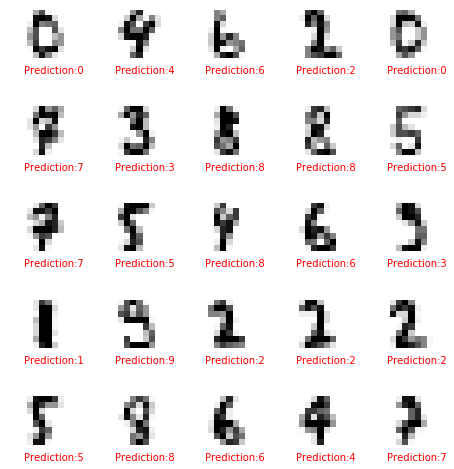

In [15]:
# Randomly select 25 images to display with predictions
m_test = X_test.shape[0]
rand_indices = np.random.permutation(m_test)

# Reconstitute images from flat to 8x8
X_test = X_test.reshape(m_test, 8, 8)

sel = X_test[rand_indices[0:25], :, :]
print('Display a few predictions, just for fun:')
display_predictions(sel)